# Imports

In [ ]:
from google.colab import drive
from PIL import Image
import os
from collections import defaultdict
import shutil
import glob
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, HBox, VBox
import ipywidgets as widgets
from IPython.display import display, Image
import warnings

In [ ]:
warnings.filterwarnings('ignore')

# Directory for images

In [ ]:
base_dir = '/path/to/your/base/directory'
shared_folder_path = '/path/to/your/shared/folder'
target_dir = os.path.join(shared_folder_path, 'images/raw')

In [ ]:
# List all files in the target directory
file_list = glob.glob(os.path.join(target_dir, '*'))

for file_path in file_list:
    with open(file_path, 'rb') as file:
        content = file.read()
    # print(f"Pulled file: {file_path}")

print("Files are ready to stop collaborate and listen")

In [ ]:
def im_a_convert(directory):
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.gif', '.bmp', '.webp', '.jpeg', 'jfif')):
            file_path = os.path.join(directory, filename)
            try:
                img = Image.open(file_path)
                rgb_img = img.convert('RGB')
                jpg_filename = os.path.splitext(filename)[0] + '.jpg'
                jpg_file_path = os.path.join(directory, jpg_filename)
                rgb_img.save(jpg_file_path, 'JPEG')
                os.remove(file_path)
                print(f"Converted {filename} to {jpg_filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")


im_a_convert(os.path.join(base_dir, target_dir))

In [ ]:
# Check if there are still files other than .jpg
def find_non_jpg_files(directory):
    non_jpg_files = []
    for filename in os.listdir(directory):
        if not filename.lower().endswith('.jpg'):
            non_jpg_files.append(filename)
    return non_jpg_files

non_jpg_files = find_non_jpg_files(target_dir)
print("Files that are not .jpg:", non_jpg_files)

In [1]:
#read in csv file
csv_path = os.path.join(base_dir, 'annotations.csv')
df = pd.read_csv(csv_path)

# **RUN THIS TO ANNOTATE**

In [ ]:
def update_annotations(row_index, updates):
    for key, value in updates.items():
        df.at[row_index, key] = value
    df.to_csv(csv_path, index=False)

def display_image_and_widgets(row_index):
    row = df.iloc[row_index]
    image_path = os.path.join(target_dir, row['filename'])
    filename_header = widgets.HTML(value=f"<h2>Filename: {row['filename']}</h2>")
    display(filename_header)
    display(Image(filename=image_path))

    updates = {}
    textboxes = {}

    for column in df.columns:
        if column not in ['filename', 'Annotator 1']:
            textboxes[column] = widgets.Text(
                value=str(row[column]),
                description=column,
                disabled=False
            )
            display(textboxes[column])

    button = widgets.Button(description="Submit")
    display(button)

    def on_button_click(b):
        for column, textbox in textboxes.items():
            updates[column] = textbox.value
        updates['Annotator 1'] = 'NAME'  # <------------------- Update when you annotate
        update_annotations(row_index, updates)
        print(f"Updated annotations for {row['filename']}")

    button.on_click(on_button_click)

for index, row in df.iterrows():
    if pd.isna(row['Annotator 1']):
        display_image_and_widgets(index)
        break

print("All images processed.")

All images processed.


In [ ]:
def check_annotations(row_index):
    row = df.iloc[row_index]
    image_path = os.path.join(target_dir, row['filename'])

    filename_header = widgets.HTML(value=f"<h2>Filename: {row['filename']}</h2>")
    display(filename_header)
    display(Image(filename=image_path))

    # Display the data from "Annotator 1"
    annotator_1_data = row['Annotator 1'] if 'Annotator 1' in row else 'No data'
    annotator_info = widgets.HTML(value=f"<h3>Annotator 1 Data: {annotator_1_data}</h3>")
    display(annotator_info)

    updates = {}
    textboxes = {}

    for column in df.columns:
        if column not in ['filename', 'Annotator 1']:
            textboxes[column] = widgets.Text(
                value=str(row[column]),
                description=column,
                disabled=False
            )
            display(textboxes[column])

    button = widgets.Button(description="Submit")
    display(button)

def display_specific_image(filename):
    row_index = df[df['filename'] == filename].index
    if not row_index.empty:
        check_annotations(row_index[0])
    else:
        print(f"Filename {filename} not found in the dataset.")

HTML(value='<h2>Filename: 417439015_10160349086008181_2503175548809643367_n.jpg</h2>')

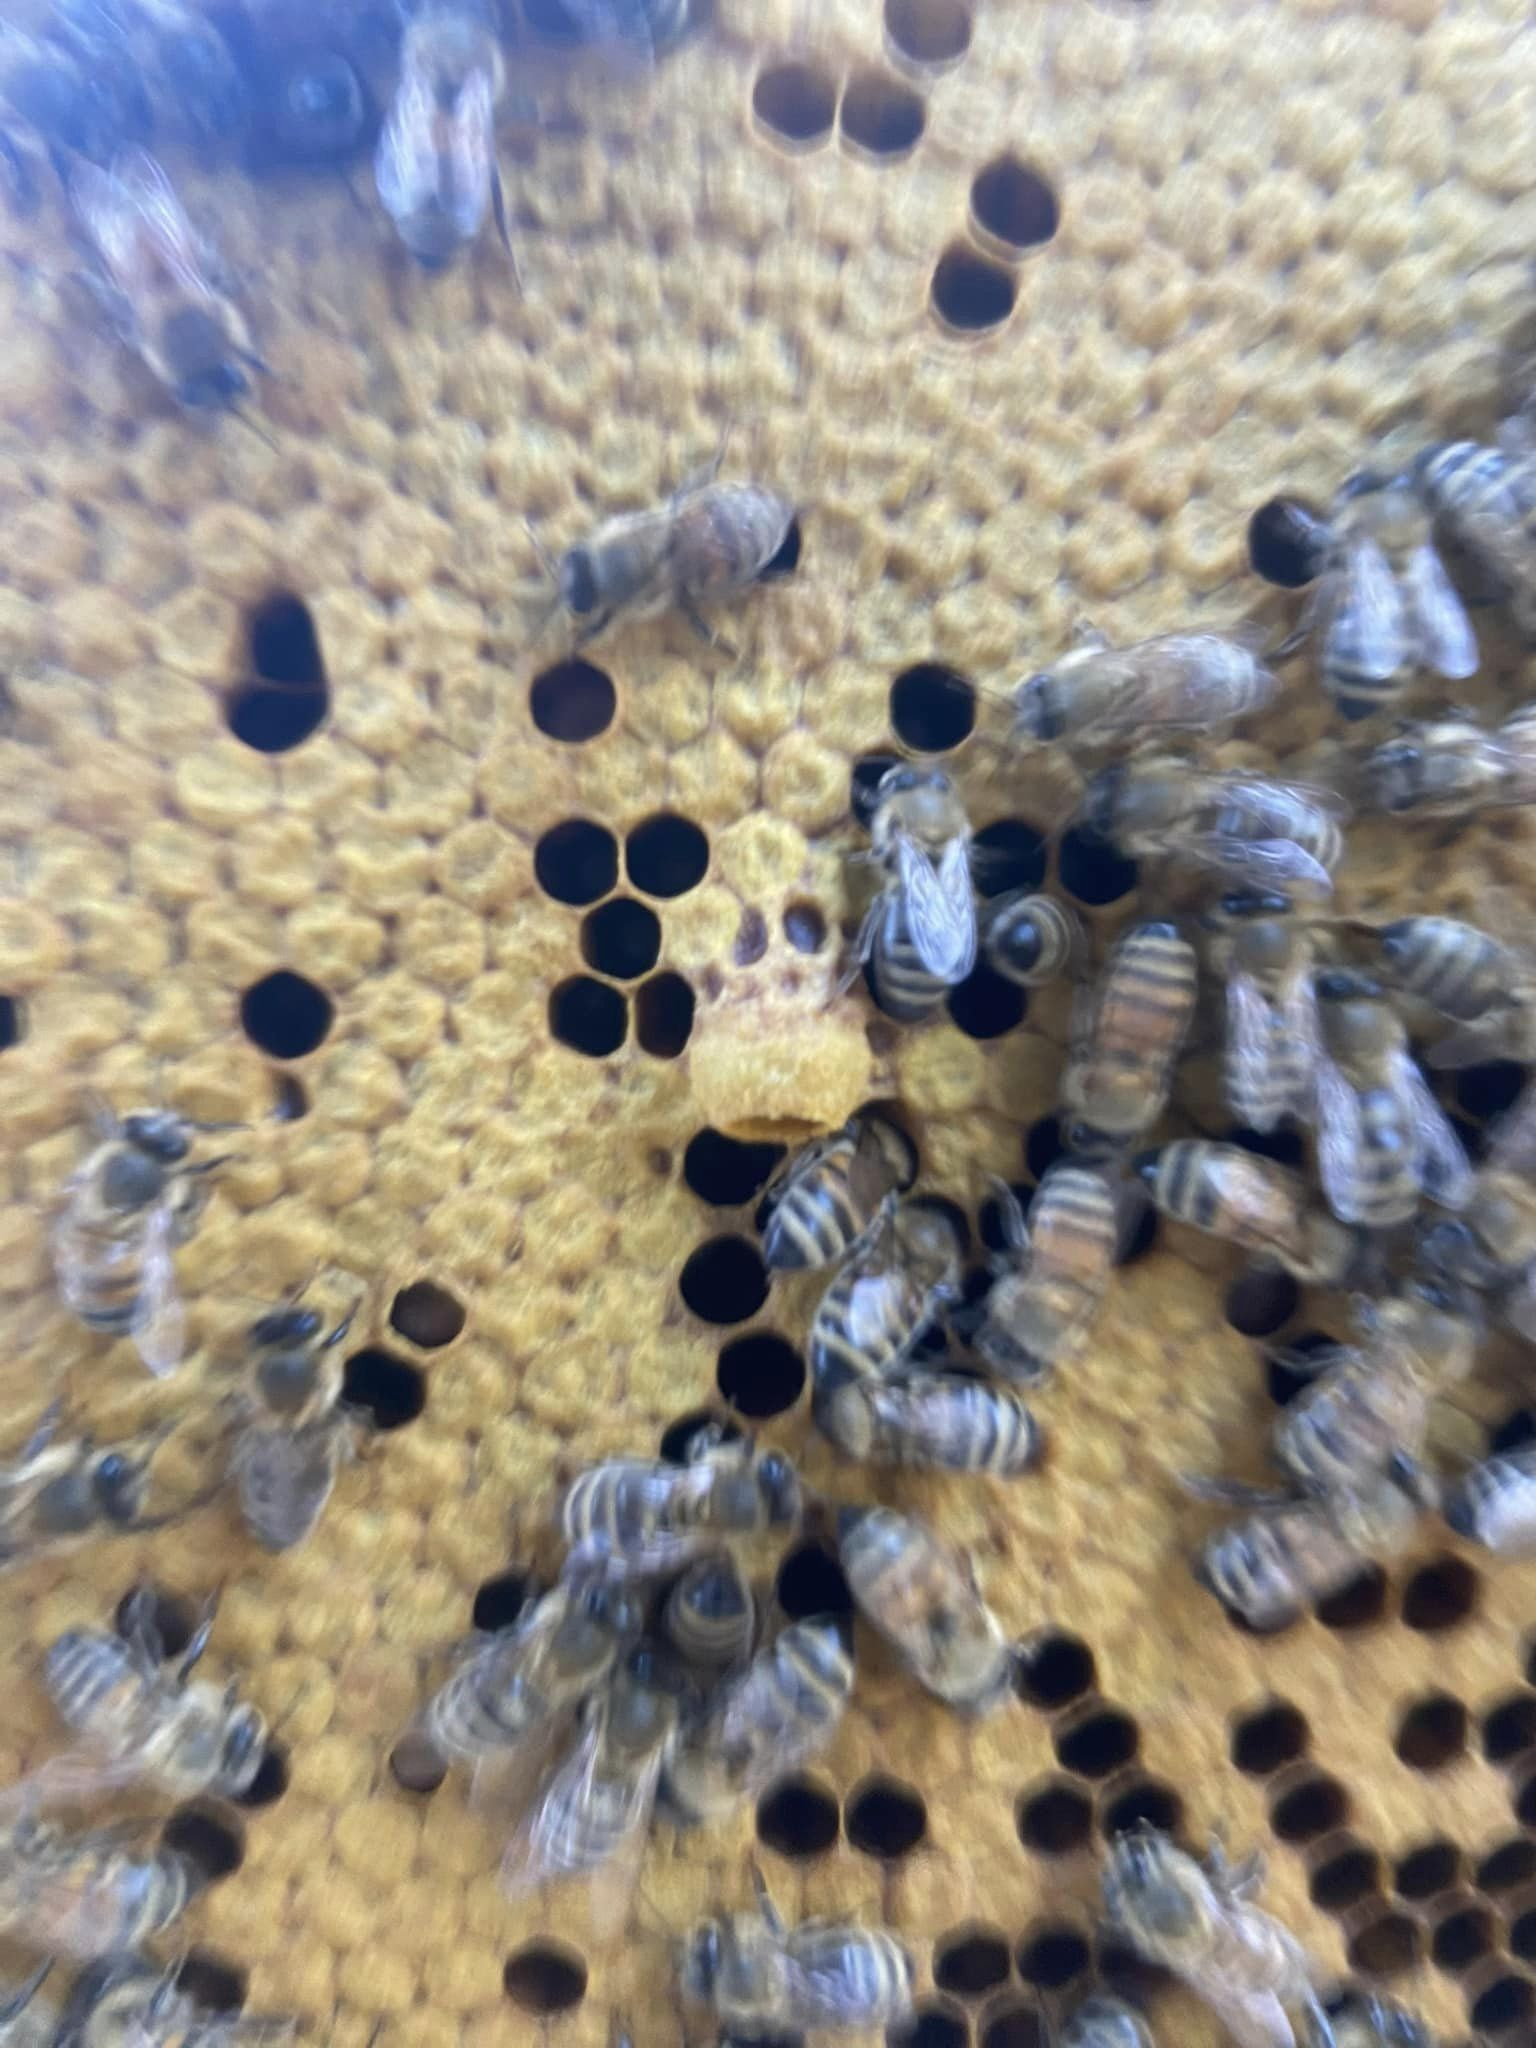

HTML(value='<h3>Annotator 1 Data: AFear</h3>')

Text(value='0', description='Wax Moth')

Text(value='0.0', description='Mold')

Text(value='0.0', description='Chalk Brood')

Text(value='0.0', description='Queen Marked')

Text(value='0.0', description='Queen Unmarked')

Text(value='0.0', description='Honey Capped')

Text(value='0.0', description='Honey Uncapped')

Text(value='0.0', description='Drone Brood')

Text(value='1.0', description='Worker Brood')

Text(value='0.0', description='Eggs')

Text(value='1.0', description='Larvae')

Text(value='1.0', description='Queen Cells')

Text(value='1.0', description='Drawn Comb')

Text(value='0.0', description='Bee Bread')

Text(value='0.0', description='Foulbrood')

Text(value='0', description='Other')

Text(value='L', description='Image Quality')

Text(value='nan', description='Annotator 2')

Text(value='Blurry', description='Comment')

Button(description='Submit', style=ButtonStyle())

All images processed.


In [ ]:
filename = '417439015_10160349086008181_2503175548809643367_n.jpg'
display_specific_image(filename)
print("All images processed.")